In [1]:
TRAIN_PATH = "CovidDataset1/Train"
VAL_PATH = "CovidDataset1/Val"
TEST_PATH = "CovidDataset1/test"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [3]:
from keras.metrics import *

METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'), 
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
]

In [4]:
# CNN Based Model in Keras
def create_model():

    model= Sequential()
    
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=METRICS)
    return model


In [5]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [6]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(
    rescale=1./255
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 8764 images belonging to 2 classes.


In [8]:
validation_generator = test_dataset.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 2150 images belonging to 2 classes.


In [9]:
test_generator = test_dataset.flow_from_directory(
    TEST_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 800 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Covid': 0, 'Negative': 1}

In [11]:
import os
from keras.callbacks import ModelCheckpoint,EarlyStopping, CSVLogger
checkpoint_path = "CNN/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='loss', verbose=1,save_weights_only=True,save_best_only=True, mode='auto')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
log_csv = CSVLogger('CNN.csv', separator=',', append=False)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5,
                              patience=5)

callbacks_list = [checkpoint,reduce_lr, log_csv]


In [12]:
hist = model.fit(
    train_generator,
   steps_per_epoch=len(train_generator),
    epochs = 120,
    validation_data = validation_generator,
    validation_steps=len(validation_generator),
    callbacks=callbacks_list
)

Epoch 1/120
274/274 [==============================] - 61s 184ms/step - loss: 5.0276 - tp: 4211.0000 - fp: 1578.0000 - tn: 2103.0000 - fn: 872.0000 - accuracy: 0.7204 - precision: 0.7274 - recall: 0.8284 - val_loss: 0.3673 - val_tp: 1546.0000 - val_fp: 125.0000 - val_tn: 289.0000 - val_fn: 190.0000 - val_accuracy: 0.8535 - val_precision: 0.9252 - val_recall: 0.8906

Epoch 00001: loss improved from inf to 5.02757, saving model to CNN\cp-0001.ckpt
Epoch 2/120
274/274 [==============================] - 43s 156ms/step - loss: 0.3576 - tp: 4349.0000 - fp: 557.0000 - tn: 3124.0000 - fn: 734.0000 - accuracy: 0.8527 - precision: 0.8865 - recall: 0.8556 - val_loss: 0.2568 - val_tp: 1612.0000 - val_fp: 109.0000 - val_tn: 305.0000 - val_fn: 124.0000 - val_accuracy: 0.8916 - val_precision: 0.9367 - val_recall: 0.9286

Epoch 00002: loss improved from 5.02757 to 0.35760, saving model to CNN\cp-0002.ckpt
Epoch 3/120
274/274 [==============================] - 43s 155ms/step - loss: 0.2823 - tp: 4523.0

274/274 [==============================] - 43s 156ms/step - loss: 0.0166 - tp: 5057.0000 - fp: 26.0000 - tn: 3655.0000 - fn: 26.0000 - accuracy: 0.9941 - precision: 0.9949 - recall: 0.9949 - val_loss: 0.6288 - val_tp: 1665.0000 - val_fp: 94.0000 - val_tn: 320.0000 - val_fn: 71.0000 - val_accuracy: 0.9233 - val_precision: 0.9466 - val_recall: 0.9591

Epoch 00038: loss improved from 0.02235 to 0.01658, saving model to CNN\cp-0038.ckpt
Epoch 39/120
274/274 [==============================] - 43s 157ms/step - loss: 0.0125 - tp: 5065.0000 - fp: 18.0000 - tn: 3663.0000 - fn: 18.0000 - accuracy: 0.9959 - precision: 0.9965 - recall: 0.9965 - val_loss: 0.5782 - val_tp: 1674.0000 - val_fp: 92.0000 - val_tn: 322.0000 - val_fn: 62.0000 - val_accuracy: 0.9284 - val_precision: 0.9479 - val_recall: 0.9643

Epoch 00039: loss improved from 0.01658 to 0.01247, saving model to CNN\cp-0039.ckpt
Epoch 40/120
274/274 [==============================] - 44s 159ms/step - loss: 0.0143 - tp: 5062.0000 - fp: 22.00

274/274 [==============================] - 42s 153ms/step - loss: 0.0043 - tp: 5067.0000 - fp: 4.0000 - tn: 3677.0000 - fn: 16.0000 - accuracy: 0.9977 - precision: 0.9992 - recall: 0.9969 - val_loss: 0.8497 - val_tp: 1677.0000 - val_fp: 99.0000 - val_tn: 315.0000 - val_fn: 59.0000 - val_accuracy: 0.9265 - val_precision: 0.9443 - val_recall: 0.9660

Epoch 00076: loss improved from 0.00436 to 0.00432, saving model to CNN\cp-0076.ckpt
Epoch 77/120
274/274 [==============================] - 43s 155ms/step - loss: 0.0034 - tp: 5075.0000 - fp: 4.0000 - tn: 3677.0000 - fn: 8.0000 - accuracy: 0.9986 - precision: 0.9992 - recall: 0.9984 - val_loss: 0.8270 - val_tp: 1669.0000 - val_fp: 95.0000 - val_tn: 319.0000 - val_fn: 67.0000 - val_accuracy: 0.9247 - val_precision: 0.9461 - val_recall: 0.9614

Epoch 00077: loss improved from 0.00432 to 0.00338, saving model to CNN\cp-0077.ckpt
Epoch 78/120
274/274 [==============================] - 43s 155ms/step - loss: 0.0028 - tp: 5073.0000 - fp: 2.0000 -


Epoch 00095: loss did not improve from 0.00276
Epoch 96/120
274/274 [==============================] - 42s 153ms/step - loss: 0.0046 - tp: 5073.0000 - fp: 6.0000 - tn: 3675.0000 - fn: 10.0000 - accuracy: 0.9982 - precision: 0.9988 - recall: 0.9980 - val_loss: 0.8816 - val_tp: 1673.0000 - val_fp: 98.0000 - val_tn: 316.0000 - val_fn: 63.0000 - val_accuracy: 0.9251 - val_precision: 0.9447 - val_recall: 0.9637

Epoch 00096: loss did not improve from 0.00276
Epoch 97/120
274/274 [==============================] - 42s 153ms/step - loss: 0.0040 - tp: 5068.0000 - fp: 4.0000 - tn: 3677.0000 - fn: 15.0000 - accuracy: 0.9978 - precision: 0.9992 - recall: 0.9970 - val_loss: 0.8744 - val_tp: 1672.0000 - val_fp: 97.0000 - val_tn: 317.0000 - val_fn: 64.0000 - val_accuracy: 0.9251 - val_precision: 0.9452 - val_recall: 0.9631

Epoch 00097: loss did not improve from 0.00276
Epoch 98/120
274/274 [==============================] - 42s 152ms/step - loss: 0.0050 - tp: 5073.0000 - fp: 5.0000 - tn: 3676.0000


Epoch 00115: loss did not improve from 0.00276
Epoch 116/120
274/274 [==============================] - 42s 152ms/step - loss: 0.0035 - tp: 5072.0000 - fp: 3.0000 - tn: 3678.0000 - fn: 11.0000 - accuracy: 0.9984 - precision: 0.9994 - recall: 0.9978 - val_loss: 0.8859 - val_tp: 1672.0000 - val_fp: 101.0000 - val_tn: 313.0000 - val_fn: 64.0000 - val_accuracy: 0.9233 - val_precision: 0.9430 - val_recall: 0.9631

Epoch 00116: loss did not improve from 0.00276
Epoch 117/120
274/274 [==============================] - 42s 152ms/step - loss: 0.0029 - tp: 5073.0000 - fp: 2.0000 - tn: 3679.0000 - fn: 10.0000 - accuracy: 0.9986 - precision: 0.9996 - recall: 0.9980 - val_loss: 0.8860 - val_tp: 1672.0000 - val_fp: 101.0000 - val_tn: 313.0000 - val_fn: 64.0000 - val_accuracy: 0.9233 - val_precision: 0.9430 - val_recall: 0.9631

Epoch 00117: loss did not improve from 0.00276
Epoch 118/120
274/274 [==============================] - 42s 152ms/step - loss: 0.0048 - tp: 5071.0000 - fp: 4.0000 - tn: 3677

In [13]:
os.listdir(checkpoint_dir)

['checkpoint',
 'cp-0001.ckpt.data-00000-of-00001',
 'cp-0001.ckpt.index',
 'cp-0002.ckpt.data-00000-of-00001',
 'cp-0002.ckpt.index',
 'cp-0003.ckpt.data-00000-of-00001',
 'cp-0003.ckpt.index',
 'cp-0004.ckpt.data-00000-of-00001',
 'cp-0004.ckpt.index',
 'cp-0005.ckpt.data-00000-of-00001',
 'cp-0005.ckpt.index',
 'cp-0006.ckpt.data-00000-of-00001',
 'cp-0006.ckpt.index',
 'cp-0007.ckpt.data-00000-of-00001',
 'cp-0007.ckpt.index',
 'cp-0008.ckpt.data-00000-of-00001',
 'cp-0008.ckpt.index',
 'cp-0009.ckpt.data-00000-of-00001',
 'cp-0009.ckpt.index',
 'cp-0010.ckpt.data-00000-of-00001',
 'cp-0010.ckpt.index',
 'cp-0011.ckpt.data-00000-of-00001',
 'cp-0011.ckpt.index',
 'cp-0012.ckpt.data-00000-of-00001',
 'cp-0012.ckpt.index',
 'cp-0013.ckpt.data-00000-of-00001',
 'cp-0013.ckpt.index',
 'cp-0014.ckpt.data-00000-of-00001',
 'cp-0014.ckpt.index',
 'cp-0015.ckpt.data-00000-of-00001',
 'cp-0015.ckpt.index',
 'cp-0016.ckpt.data-00000-of-00001',
 'cp-0016.ckpt.index',
 'cp-0017.ckpt.data-00000

In [14]:
import tensorflow
latest = tensorflow.train.latest_checkpoint(checkpoint_dir)
latest

'CNN\\cp-0078.ckpt'

In [15]:
# Create a basic model instance
model = create_model()

# Evaluate the model
results = model.evaluate_generator(validation_generator, 1)
print("The model has a {}% accuracy, with a loss of {}.".format(results[5]*100, results[0])) 


C:\Users\User\anaconda3\envs\TF-Gpu\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


The model has a 91.33822321891785% accuracy, with a loss of 16.20948028564453.


In [16]:
# Create a new model instance
model = create_model()

# Load the previously saved weights
model.load_weights(latest)

results = model.evaluate_generator(validation_generator, 1)
print("The model has a {}% accuracy, with a loss of {}.".format(results[5]*100, results[0])) 


The model has a 91.46341681480408% accuracy, with a loss of 0.006018230691552162.


In [17]:
model.evaluate_generator(train_generator)

[0.0006076043355278671,
 5080.0,
 0.0,
 3681.0,
 3.0,
 0.9996576905250549,
 1.0,
 0.9994097948074341]

In [18]:
model.evaluate_generator(validation_generator)

[0.8561549186706543,
 1673.0,
 98.0,
 316.0,
 63.0,
 0.9251163005828857,
 0.9446640610694885,
 0.9637096524238586]

In [19]:
model.evaluate_generator(test_generator)

[1.7328686714172363,
 388.0,
 87.0,
 313.0,
 12.0,
 0.8762500286102295,
 0.8168420791625977,
 0.9700000286102295]

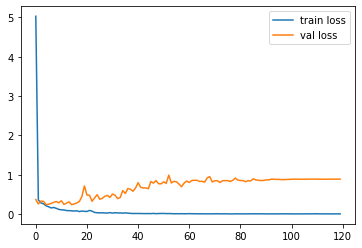

<Figure size 432x288 with 0 Axes>

In [20]:
# loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

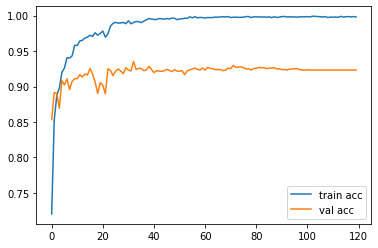

<Figure size 432x288 with 0 Axes>

In [21]:
# accuracies
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
y_actual = []
y_test = []

In [23]:
import os
from keras.preprocessing import image
import numpy as np
for i in os.listdir("CovidDataset1/val/Negative/"):
   img = image.load_img("CovidDataset1/val/Negative/"+i, target_size= (224, 224));
   img = image.img_to_array(img)
   img = np.expand_dims(img, axis = 0)
   p = model.predict(img)
   classes_x=np.argmax(p,axis=0)
   y_test.append(p[0,0])
   y_actual.append(1)


In [24]:
for i in os.listdir("CovidDataset1/val/Covid/"):
   img = image.load_img("CovidDataset1/val/Covid/"+i, target_size= (224, 224));
   img = image.img_to_array(img)
   img = np.expand_dims(img, axis = 0)
   p = model.predict(img)
   classes_x=np.argmax(p,axis=0)
   y_test.append(p[0,0])
   y_actual.append(0)


In [25]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [26]:
print(y_actual)


[1 1 1 ... 0 0 0]


In [27]:
print(y_test)

[1.0000000e+00 1.0000000e+00 1.0000000e+00 ... 2.1082222e-01 1.8185638e-19
 2.0185593e-07]


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual, np.round(y_test))
cm

array([[ 316,   98],
       [  63, 1673]], dtype=int64)

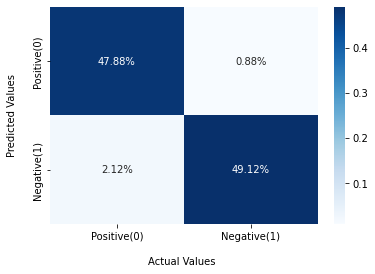

In [3]:
cm=[[383, 7],
     [ 17, 393]]

import seaborn as sns

ax = sns.heatmap(cm/np.sum(cm), cmap = "Blues", fmt='.2%', annot=True)

ax.set_ylabel('Predicted Values\n')
ax.set_xlabel('\nActual Values ');

## Ticket labels - List must be in alphabetical order
ax.yaxis.set_ticklabels(['Positive(0)','Negative(1)'])
ax.xaxis.set_ticklabels(['Positive(0)','Negative(1)'])

## Display the visualization of the Confusion Matrix.
plt.show()

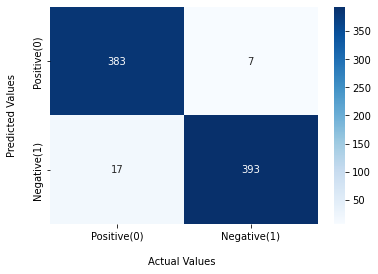

In [4]:
cm=[[383, 7],
     [ 17, 393]]

import seaborn as sns

ax = sns.heatmap(cm, cmap = "Blues", annot=True, fmt=".0f")

ax.set_ylabel('Predicted Values\n')
ax.set_xlabel('\nActual Values ');

## Ticket labels - List must be in alphabetical order
ax.yaxis.set_ticklabels(['Positive(0)','Negative(1)'])
ax.xaxis.set_ticklabels(['Positive(0)','Negative(1)'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_actual, np.round(abs(y_test))))


              precision    recall  f1-score   support

           0       0.83      0.76      0.80       414
           1       0.94      0.96      0.95      1736

    accuracy                           0.93      2150
   macro avg       0.89      0.86      0.88      2150
weighted avg       0.92      0.93      0.92      2150

